# Real-world Data Wrangling

This project investigates global air pollution trends with a focus on identifying the most affected countries, assessing the impact of the COVID-19 pandemic on pollution levels, and evaluating how air quality has evolved over time. By analyzing PM2.5 concentration data from multiple years and regions, the study addresses three primary questions:

Which countries were the most polluted during the observed period?

Was there a significant drop in air pollution in 2020, potentially due to COVID-19 lockdowns?

Which countries experienced the greatest improvement or deterioration in air quality between 2018 and 2021?

 PM2.5 is a major component of air pollution and smog — often produced by vehicle emissions, industrial activity, wildfires, and fossil fuel burning.
 It’s one of the key indicators used by the World Health Organization and environmental agencies to assess air quality.

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

In [28]:
%pip install pymongo
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pymongo
from pymongo import MongoClient
import json

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### **Dataset 1**

Type: CSV File.

Method: The data was gathered using the "Downloading files" method from Kaggle.

Dataset variables:

Rank         
City         
2021         
JAN(2021)    
FEB(2021)    
MAR(2021)    
APR(2021)    
MAY(2021)    
JUN(2021)    
JUL(2021)    
AUG(2021)    
SEP(2021)    
OCT(2021)    
NOV(2021)    
DEC(2021)    
2020         
2019         
2018         
2017         

In [29]:
#Loading data locally
data=pd.read_csv(r"AIR QUALITY INDEX (by cities) - IQAir.csv")
data.replace('-', np.nan, inplace=True)
data


,Rank,City,2021,JAN(2021),FEB(2021),MAR(2021),APR(2021),MAY(2021),JUN(2021),JUL(2021),AUG(2021),SEP(2021),OCT(2021),NOV(2021),DEC(2021),2020,2019,2018,2017
0,1,"Bhiwadi, India",106.2,145.8,129.8,120.2,125.7,86.5,95.9,55.6,55.4,37.1,91.1,188.6,136.6,95.5,83.4,125.4,NaN
1,2,"Ghaziabad, India",102.0,199.9,172.2,97.8,86.3,52.9,47.2,35.3,37.6,30.8,89.7,218.3,163,106.6,110.2,135.2,144.6
2,3,"Hotan, China",101.5,NaN,NaN,158,91.1,167.4,57.4,70.9,93.2,79.3,126.1,111.5,62.6,110.2,110.1,116,91.9
3,4,"Delhi, India",96.4,183.7,142.2,80.5,72.9,47.4,47.1,35.6,36.9,30.2,73.7,224.1,186.4,84.1,98.6,113.5,108.2
4,5,"Jaunpur, India",95.3,182.2,143.5,91,70,51.1,40.7,33.5,34.2,36.8,75.7,196,195.7,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6470,6471,"Mornington, Australia",2.4,2,1.9,2.3,2.1,3.2,3.6,4.3,2.1,2.1,1.7,2,1.9,3.2,3.8,3,3.9
6471,6472,"Emu River, Australia",2.1,1.9,1.8,2,2.6,3.4,2.6,1.9,2.1,2.2,1.5,1.4,1.5,2.6,2.5,2.6,2.3
6472,6473,"Judbury, Australia",2.0,1.6,1.5,2.1,1.5,4.1,2,2.2,2.2,1.7,1.5,1.4,1.7,2.4,5.7,2.2,1.9
6473,6474,"St Helens, Australia",1.9,1.8,2.1,2,2.4,2.7,1.6,1.6,1.6,1.9,1.6,2.4,1.6,2.4,2.4,2.9,3.3


#### Dataset 2

Type: CSV File.

Method:  The data was gathered using the API method from Kaggle.

Dataset variables:

Rank              
Country/Region    
2021              
2020              
2019              
2018              
Population  

In [30]:
#Loading dataset 2 using api
os.makedirs(os.path.expanduser("~/.cache/kagglehub"), exist_ok=True)

file_path = "AIR QUALITY INDEX- top countries.csv"

data2 = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    
    "ramjasmaurya/most-polluted-cities-and-countries-iqair-index",
    file_path
)

print("First 5 records:")
print(data2.head())


desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "polluted_cities.csv")
data2.to_csv(desktop_path, index=False)
print(f"\nDataset saved to: {desktop_path}")


C:\Users\asus\AppData\Local\Temp\ipykernel_1612\69522270.py:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  data2 = kagglehub.load_dataset(


First 5 records:
   Rank Country/Region  2021  2020  2019  2018     Population
0     1     Bangladesh  76.9  77.1  83.3  97.1    164,689,383
1     2           Chad  75.9     -     -     -     16,425,859
2     3       Pakistan  66.8    59  65.8  74.3    220,892,331
3     4     Tajikistan  59.4  30.9     -     -      9,537,642
4     5          India  58.1  51.9  58.1  72.5  1,380,004,385

Dataset saved to: C:\Users\asus\Desktop\polluted_cities.csv


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:
Missing Values Represented as Dashes

In [31]:
print("Dataset 1 - Checking for dash characters:")
print(data.isin(['-']).sum())
print("\nDataset 2 - Checking for dash characters:")
print(data2.isin(['-']).sum())



Dataset 1 - Checking for dash characters:
Rank         0
City         0
2021         0
JAN(2021)    0
FEB(2021)    0
MAR(2021)    0
APR(2021)    0
MAY(2021)    0
JUN(2021)    0
JUL(2021)    0
AUG(2021)    0
SEP(2021)    0
OCT(2021)    0
NOV(2021)    0
DEC(2021)    0
2020         0
2019         0
2018         0
2017         0
dtype: int64

Dataset 2 - Checking for dash characters:
Rank               0
Country/Region     0
2021               0
2020              17
2019              27
2018              46
Population         0
dtype: int64


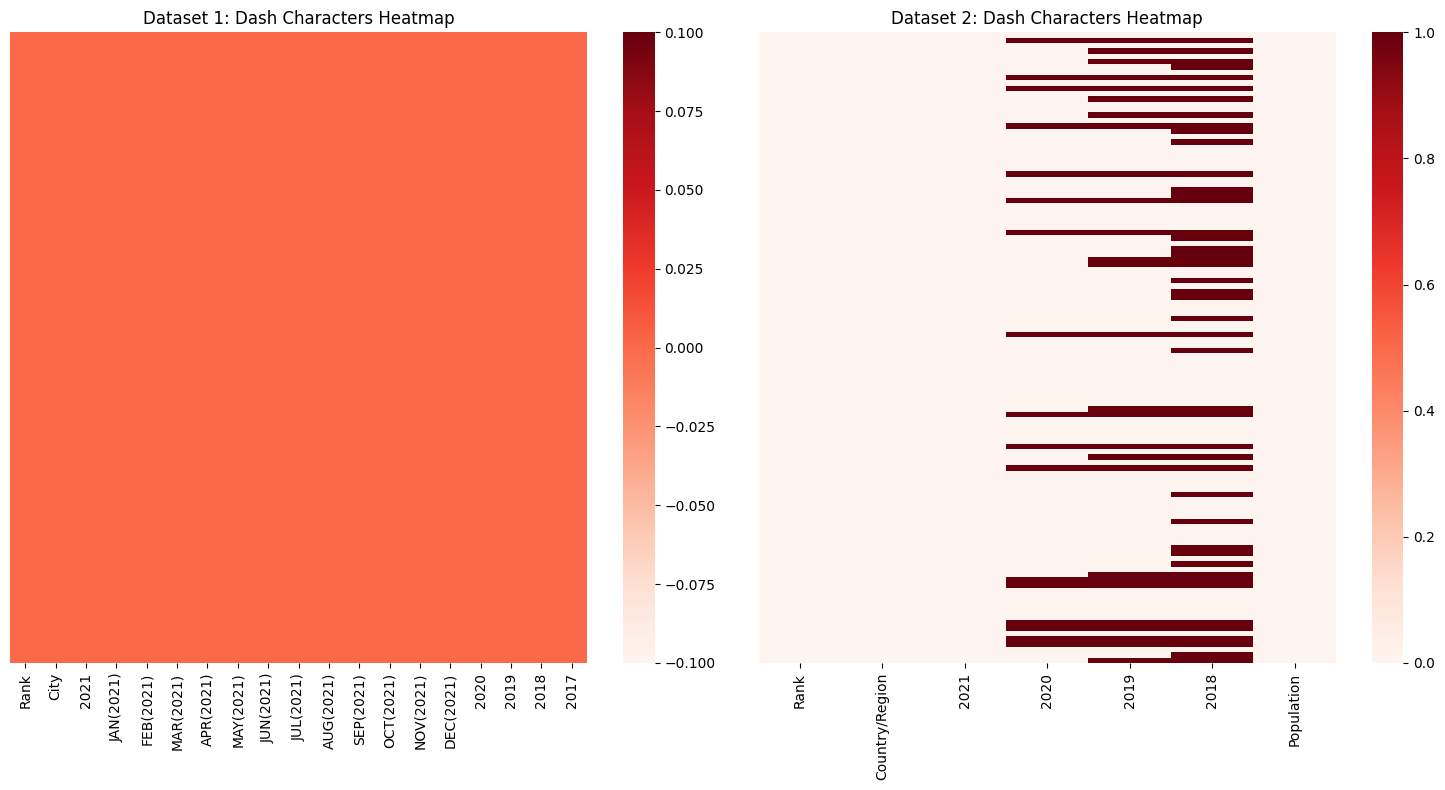

In [32]:
# Visual inspection
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.heatmap(data.isin(['-']), cbar=True, cmap='Reds', yticklabels=False)
plt.title("Dataset 1: Dash Characters Heatmap")

plt.subplot(1, 2, 2)
sns.heatmap(data2.isin(['-']), cbar=True, cmap='Reds', yticklabels=False)
plt.title("Dataset 2: Dash Characters Heatmap")
plt.tight_layout()
plt.show()

### **Quality Issue 1 Justification:** 
The datasets use dash characters ('-') to represent missing values instead of proper NaN values. This is a **validity issue** because the data doesn't conform to standard missing value representation, making it impossible to perform numerical operations or statistical analysis on these columns.


### Quality Issue 2:
 Incorrect Data Types

In [33]:
print("Dataset 1 data types:")
print(data.dtypes)
print("\nDataset 2 data types:")
print(data2.dtypes)



Dataset 1 data types:
Rank           int64
City          object
2021         float64
JAN(2021)     object
FEB(2021)     object
MAR(2021)     object
APR(2021)     object
MAY(2021)     object
JUN(2021)     object
JUL(2021)     object
AUG(2021)     object
SEP(2021)     object
OCT(2021)     object
NOV(2021)     object
DEC(2021)     object
2020          object
2019          object
2018          object
2017          object
dtype: object

Dataset 2 data types:
Rank                int64
Country/Region     object
2021              float64
2020               object
2019               object
2018               object
Population         object
dtype: object


In [34]:
# Check which columns should be numeric but are object type
numeric_cols_1 = ['2021', 'JAN(2021)', 'FEB(2021)', 'MAR(2021)', 'APR(2021)', 
                  'MAY(2021)', 'JUN(2021)', 'JUL(2021)', 'AUG(2021)', 'SEP(2021)', 
                  'OCT(2021)', 'NOV(2021)', 'DEC(2021)', '2020', '2019', '2018', '2017']

numeric_cols_2 = ['2021', '2020', '2019', '2018', 'Population']

print("\nColumns that should be numeric in Dataset 1:")
for col in numeric_cols_1:
    if col in data.columns:
        print(f"{col}: {data[col].dtype}")

print("\nColumns that should be numeric in Dataset 2:")
for col in numeric_cols_2:
    if col in data2.columns:
        print(f"{col}: {data2[col].dtype}")


Columns that should be numeric in Dataset 1:
2021: float64
JAN(2021): object
FEB(2021): object
MAR(2021): object
APR(2021): object
MAY(2021): object
JUN(2021): object
JUL(2021): object
AUG(2021): object
SEP(2021): object
OCT(2021): object
NOV(2021): object
DEC(2021): object
2020: object
2019: object
2018: object
2017: object

Columns that should be numeric in Dataset 2:
2021: float64
2020: object
2019: object
2018: object
Population: object


### **Quality Issue 2 Justification:** 
Numerical columns are stored as object/string type instead of numeric types. This is a **validity issue** because the data doesn't conform to the appropriate data type format, preventing mathematical operations and statistical analysis.


# ### Tidiness Issue 1: Columns Contain Values Instead of Variables


In [35]:
#FILL IN - Inspecting the dataframe visually
print("Dataset 1 columns:")
print(data.columns.tolist())
print("\nDataset 2 columns:")
print(data2.columns.tolist())

# Check the structure
print("\nDataset 1 sample data:")
print(data[['City', 'JAN(2021)', 'FEB(2021)', 'MAR(2021)']].head())


Dataset 1 columns:
['Rank', 'City', '2021', 'JAN(2021)', 'FEB(2021)', 'MAR(2021)', 'APR(2021)', 'MAY(2021)', 'JUN(2021)', 'JUL(2021)', 'AUG(2021)', 'SEP(2021)', 'OCT(2021)', 'NOV(2021)', 'DEC(2021)', '2020', '2019', '2018', '2017']

Dataset 2 columns:
['Rank', 'Country/Region', '2021', '2020', '2019', '2018', 'Population']

Dataset 1 sample data:
               City JAN(2021) FEB(2021) MAR(2021)
0    Bhiwadi, India     145.8     129.8     120.2
1  Ghaziabad, India     199.9     172.2      97.8
2      Hotan, China       NaN       NaN       158
3      Delhi, India     183.7     142.2      80.5
4    Jaunpur, India     182.2     143.5        91


### **Tidiness Issue 1 Justification:** 
In Dataset 1, month columns (JAN(2021), FEB(2021), etc.) represent values (time periods) rather than variables. According to tidy data principles, each variable should form a column, but here we have months as column headers when they should be values in a single "Month" column. This violates the principle that each variable forms a column.


### Tidiness Issue 2: Multiple Observational Units in Single Table


In [36]:
print("Dataset 1 columns analysis:")
print("Temporal columns:", [col for col in data.columns if any(year in col for year in ['2021', '2020', '2019', '2018', '2017'])])
print("Identifier columns:", [col for col in data.columns if col in ['Rank', 'City']])

print("\nDataset 2 columns analysis:")
print("Temporal columns:", [col for col in data2.columns if col in ['2021', '2020', '2019', '2018']])
print("Identifier columns:", [col for col in data2.columns if col in ['Rank', 'Country/Region']])
print("Additional columns:", [col for col in data2.columns if col not in ['Rank', 'Country/Region', '2021', '2020', '2019', '2018']])


Dataset 1 columns analysis:
Temporal columns: ['2021', 'JAN(2021)', 'FEB(2021)', 'MAR(2021)', 'APR(2021)', 'MAY(2021)', 'JUN(2021)', 'JUL(2021)', 'AUG(2021)', 'SEP(2021)', 'OCT(2021)', 'NOV(2021)', 'DEC(2021)', '2020', '2019', '2018', '2017']
Identifier columns: ['Rank', 'City']

Dataset 2 columns analysis:
Temporal columns: ['2021', '2020', '2019', '2018']
Identifier columns: ['Rank', 'Country/Region']
Additional columns: ['Population']


### **Tidiness Issue 2 Justification:** 
The datasets contain multiple observational units in a single table. Dataset 1 contains both city identification data (Rank, City) and temporal AQI measurements (monthly and yearly data). Dataset 2 mixes geographical/administrative data (Country/Region, Population) with temporal AQI data. According to tidy data principles, each type of observational unit should form a separate table.


## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [37]:
Data1=data.copy()
Data2=data2.copy()

### Quality Issue 1: Convert Dashes to NaN


### Missing values is the first quality issue and i chose to deal with it later on the project

In [38]:
Data1.replace('-', np.nan, inplace=True)
Data2.replace('-', np.nan, inplace=True)



In [39]:
# Validate cleaning
print("After cleaning - Missing values count:")
print("Dataset 1:")
print(Data1.isnull().sum())
print("\nDataset 2:")
print(Data2.isnull().sum())

# Assert that no dash characters remain
assert not Data1.isin(['-']).any().any(), "Dataset 1 still contains dash characters"
assert not Data2.isin(['-']).any().any(), "Dataset 2 still contains dash characters"
print("✓ Validation successful: No dash characters remain in either dataset")


After cleaning - Missing values count:
Dataset 1:
Rank            0
City            0
2021            0
JAN(2021)     671
FEB(2021)     574
MAR(2021)     193
APR(2021)     256
MAY(2021)      16
JUN(2021)      16
JUL(2021)      22
AUG(2021)       9
SEP(2021)      17
OCT(2021)      26
NOV(2021)      43
DEC(2021)      87
2020         2207
2019         2422
2018         3999
2017         4194
dtype: int64

Dataset 2:
Rank               0
Country/Region     0
2021               0
2020              17
2019              27
2018              46
Population         0
dtype: int64
✓ Validation successful: No dash characters remain in either dataset


### **Justification:** 
Replaced dash characters with NaN values to properly represent missing data, enabling proper statistical analysis and data type conversion.


### Quality Issue 2: Convert Data Types


In [40]:
numeric_cols_1 = ['2021', 'JAN(2021)', 'FEB(2021)', 'MAR(2021)', 'APR(2021)', 
                  'MAY(2021)', 'JUN(2021)', 'JUL(2021)', 'AUG(2021)', 'SEP(2021)', 
                  'OCT(2021)', 'NOV(2021)', 'DEC(2021)', '2020', '2019', '2018', '2017']

numeric_cols_2 = ['2021', '2020', '2019', '2018', 'Population']

# Apply cleaning - Convert to numeric
for col in numeric_cols_1:
    if col in Data1.columns:
        Data1[col] = pd.to_numeric(Data1[col], errors='coerce')

for col in numeric_cols_2:
    if col in Data2.columns:
        Data2[col] = pd.to_numeric(Data2[col], errors='coerce')



In [41]:
# Validate cleaning
print("After cleaning - Data types:")
print("Dataset 1:")
print(Data1.dtypes)
print("\nDataset 2:")
print(Data2.dtypes)

# Assert that numeric columns are now numeric
for col in numeric_cols_1:
    if col in Data1.columns:
        assert pd.api.types.is_numeric_dtype(Data1[col]), f"Column {col} is not numeric in dataset 1"

for col in numeric_cols_2:
    if col in Data2.columns:
        assert pd.api.types.is_numeric_dtype(Data2[col]), f"Column {col} is not numeric in dataset 2"

print("✓ Validation successful: All specified columns are now numeric")


After cleaning - Data types:
Dataset 1:
Rank           int64
City          object
2021         float64
JAN(2021)    float64
FEB(2021)    float64
MAR(2021)    float64
APR(2021)    float64
MAY(2021)    float64
JUN(2021)    float64
JUL(2021)    float64
AUG(2021)    float64
SEP(2021)    float64
OCT(2021)    float64
NOV(2021)    float64
DEC(2021)    float64
2020         float64
2019         float64
2018         float64
2017         float64
dtype: object

Dataset 2:
Rank                int64
Country/Region     object
2021              float64
2020              float64
2019              float64
2018              float64
Population        float64
dtype: object
✓ Validation successful: All specified columns are now numeric


### **Justification:** Converted string/object columns to appropriate numeric types to enable mathematical operations and statistical analysis.


### Tidiness Issue 1: Reshape Data from Wide to Long Format


In [42]:
monthly_cols = ['JAN(2021)', 'FEB(2021)', 'MAR(2021)', 'APR(2021)', 'MAY(2021)', 
                'JUN(2021)', 'JUL(2021)', 'AUG(2021)', 'SEP(2021)', 'OCT(2021)', 
                'NOV(2021)', 'DEC(2021)']

# Create month mapping
month_mapping = {
    'JAN(2021)': 'January', 'FEB(2021)': 'February', 'MAR(2021)': 'March',
    'APR(2021)': 'April', 'MAY(2021)': 'May', 'JUN(2021)': 'June',
    'JUL(2021)': 'July', 'AUG(2021)': 'August', 'SEP(2021)': 'September',
    'OCT(2021)': 'October', 'NOV(2021)': 'November', 'DEC(2021)': 'December'
}

# Melt monthly data
monthly_data = Data1[['City'] + monthly_cols].melt(
    id_vars=['City'], 
    value_vars=monthly_cols,
    var_name='Month', 
    value_name='Monthly_AQI'
)

# Map month names
monthly_data['Month'] = monthly_data['Month'].map(month_mapping)




In [43]:
# Validate reshaping
print("Original shape:", Data1.shape)
print("Reshaped monthly data shape:", monthly_data.shape)
print("\nSample of reshaped data:")
print(monthly_data.head(10))

# Assert that reshaping worked correctly
expected_rows = len(Data1) * len(monthly_cols)
assert len(monthly_data) == expected_rows, f"Expected {expected_rows} rows, got {len(monthly_data)}"
assert 'Month' in monthly_data.columns, "Month column not created"
assert 'Monthly_AQI' in monthly_data.columns, "Monthly_AQI column not created"
print("✓ Validation successful: Data successfully reshaped from wide to long format")

Original shape: (6475, 19)
Reshaped monthly data shape: (77700, 3)

Sample of reshaped data:
                   City    Month  Monthly_AQI
0        Bhiwadi, India  January        145.8
1      Ghaziabad, India  January        199.9
2          Hotan, China  January          NaN
3          Delhi, India  January        183.7
4        Jaunpur, India  January        182.2
5  Faisalabad, Pakistan  January        207.1
6          Noida, India  January        185.3
7  Bahawalpur, Pakistan  January        173.9
8    Peshawar, Pakistan  January        103.9
9         Bagpat, India  January        146.1
✓ Validation successful: Data successfully reshaped from wide to long format


### **Justification:** 
Transformed the data from wide format (months as columns) to long format (months as values) to follow tidy data principles where each variable forms a column.


### Tidiness Issue 2: Separate Observational Units


In [44]:
location_data_1 = Data1[['Rank', 'City']].drop_duplicates()
temporal_data_1 = Data1[['City', '2021', '2020', '2019', '2018', '2017']]

# Separate Dataset 2 into location and temporal data
location_data_2 = Data2[['Rank', 'Country/Region', 'Population']].drop_duplicates()
temporal_data_2 = Data2[['Country/Region', '2021', '2020', '2019', '2018']]



In [45]:
# Validate separation
print("Location data 1 shape:", location_data_1.shape)
print("Temporal data 1 shape:", temporal_data_1.shape)
print("Location data 2 shape:", location_data_2.shape)
print("Temporal data 2 shape:", temporal_data_2.shape)

# Assert that separation worked correctly
assert len(location_data_1) <= len(Data1), "Location data 1 has more rows than original"
assert len(temporal_data_1) == len(Data1), "Temporal data 1 doesn't match original row count"
assert len(location_data_2) <= len(Data2), "Location data 2 has more rows than original"
assert len(temporal_data_2) == len(Data2), "Temporal data 2 doesn't match original row count"
print("✓ Validation successful: Observational units successfully separated")

Location data 1 shape: (6475, 2)
Temporal data 1 shape: (6475, 6)
Location data 2 shape: (118, 3)
Temporal data 2 shape: (118, 5)
✓ Validation successful: Observational units successfully separated


### **Justification:** 
Separated mixed observational units into distinct tables - location/administrative data separate from temporal AQI measurements, following the principle that each type of observational unit should form a separate table.


### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [46]:
cities_clean = Data1[['City', '2021', '2020', '2019', '2018']].copy()
cities_clean['Type'] = 'City'
cities_clean.rename(columns={'City': 'Location'}, inplace=True)

# For countries data - keep country name and recent AQI data  
countries_clean = Data2[['Country/Region', '2021', '2020', '2019', '2018']].copy()
countries_clean['Type'] = 'Country'
countries_clean.rename(columns={'Country/Region': 'Location'}, inplace=True)

# Combine datasets
combined_data = pd.concat([cities_clean, countries_clean], ignore_index=True)


In [47]:

# Final validation
print("Final combined dataset shape:", combined_data.shape)
print("Final columns:", combined_data.columns.tolist())
print("\nSample of final data:")
print(combined_data.head())

# Assert final dataset has required variables
required_vars = ['Location', 'Type', '2021', '2020', '2019', '2018']
assert all(var in combined_data.columns for var in required_vars), "Missing required variables"
assert len(combined_data.columns) >= 4, "Dataset must have at least 4 variables"
print("✓ Validation successful: Final dataset has required structure with", len(combined_data.columns), "variables")

# %% [markdown]
# **Final Dataset Summary:**
# - **6 variables**: Location, Type, 2021, 2020, 2019, 2018
# - **Combined data**: Cities and countries in one table
# - **Clean data**: Proper data types, no dash characters, tidy structure
# - **Ready for analysis**: Can now perform statistical analysis and comparisons

# %%
# Final data quality check
print("=== FINAL DATA QUALITY SUMMARY ===")
print(f"Total observations: {len(combined_data)}")
print(f"Total variables: {len(combined_data.columns)}")
print(f"Missing values per column:")
print(combined_data.isnull().sum())
print(f"\nData types:")
print(combined_data.dtypes)
print(f"\nNo dash characters remaining: {not combined_data.isin(['-']).any().any()}")
print(f"All numeric columns are numeric type: {all(pd.api.types.is_numeric_dtype(combined_data[col]) for col in ['2021', '2020', '2019', '2018'])}")

Final combined dataset shape: (6593, 6)
Final columns: ['Location', '2021', '2020', '2019', '2018', 'Type']

Sample of final data:
           Location   2021   2020   2019   2018  Type
0    Bhiwadi, India  106.2   95.5   83.4  125.4  City
1  Ghaziabad, India  102.0  106.6  110.2  135.2  City
2      Hotan, China  101.5  110.2  110.1  116.0  City
3      Delhi, India   96.4   84.1   98.6  113.5  City
4    Jaunpur, India   95.3    NaN    NaN    NaN  City
✓ Validation successful: Final dataset has required structure with 6 variables
=== FINAL DATA QUALITY SUMMARY ===
Total observations: 6593
Total variables: 6
Missing values per column:
Location       0
2021           0
2020        2224
2019        2449
2018        4045
Type           0
dtype: int64

Data types:
Location     object
2021        float64
2020        float64
2019        float64
2018        float64
Type         object
dtype: object

No dash characters remaining: True
All numeric columns are numeric type: True


In [48]:
analysis_data = combined_data.melt(
    id_vars=['Location', 'Type'], 
    value_vars=['2018', '2019', '2020', '2021'],
    var_name='Year', 
    value_name='AQI'
)

# Convert Year to numeric
analysis_data['Year'] = pd.to_numeric(analysis_data['Year'])

# Rename Location to Country for consistency (since we're combining cities and countries)
analysis_data.rename(columns={'Location': 'Country'}, inplace=True)

print("Analysis data shape:", analysis_data.shape)
print("Sample of analysis data:")
print(analysis_data.head(10))

Analysis data shape: (26372, 4)
Sample of analysis data:
                Country  Type  Year    AQI
0        Bhiwadi, India  City  2018  125.4
1      Ghaziabad, India  City  2018  135.2
2          Hotan, China  City  2018  116.0
3          Delhi, India  City  2018  113.5
4        Jaunpur, India  City  2018    NaN
5  Faisalabad, Pakistan  City  2018  130.4
6          Noida, India  City  2018  123.6
7  Bahawalpur, Pakistan  City  2018    NaN
8    Peshawar, Pakistan  City  2018    NaN
9         Bagpat, India  City  2018    NaN


### Dealing with misssing values

In [49]:
print("Missing values before filling:")
print(analysis_data.isnull().sum())

# Fill NaN values in AQI with the country's mean
analysis_data['AQI'] = analysis_data.groupby('Country')['AQI'].transform(lambda x: x.fillna(x.mean()))

# Check missing values after filling
print("\nMissing values after filling:")
print(analysis_data.isnull().sum())

# Show example of filled data
print("\nSample of data after filling missing values:")
print(analysis_data.head(10))



Missing values before filling:
Country       0
Type          0
Year          0
AQI        8718
dtype: int64

Missing values after filling:
Country    0
Type       0
Year       0
AQI        0
dtype: int64

Sample of data after filling missing values:
                Country  Type  Year     AQI
0        Bhiwadi, India  City  2018  125.40
1      Ghaziabad, India  City  2018  135.20
2          Hotan, China  City  2018  116.00
3          Delhi, India  City  2018  113.50
4        Jaunpur, India  City  2018   95.30
5  Faisalabad, Pakistan  City  2018  130.40
6          Noida, India  City  2018  123.60
7  Bahawalpur, Pakistan  City  2018   84.85
8    Peshawar, Pakistan  City  2018   76.75
9         Bagpat, India  City  2018   88.85


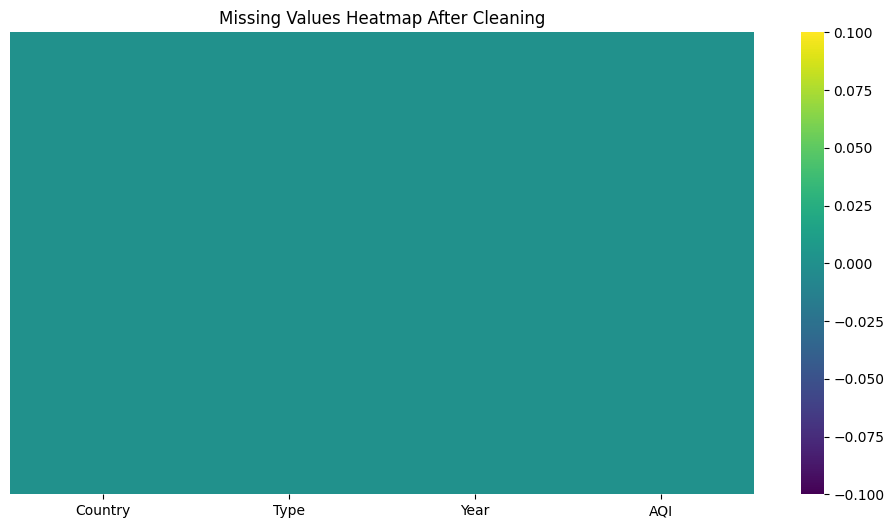

In [50]:
# %%
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(analysis_data.isnull(), cbar=True, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap After Cleaning")
plt.show()

### **Missing Values Justification:** 
I filled missing AQI values with each country's mean AQI across available years. This approach maintains the unique environmental profile of each country rather than using global averages, as each country has distinct industrial, policy, and geographical factors affecting air quality.


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [51]:
import os

# Create directory if it doesn't exist
os.makedirs("cleaned_data", exist_ok=True)

# Save raw data (combined but not analyzed)
combined_data.to_csv("cleaned_data/raw_combined_aqi_data.csv", index=False)

# Save analysis-ready data
analysis_data.to_csv("cleaned_data/cleaned_aqi_analysis_data.csv", index=False)

print("✓ Raw combined data saved as: cleaned_data/raw_combined_aqi_data.csv")
print("✓ Analysis-ready data saved as: cleaned_data/cleaned_aqi_analysis_data.csv")

# Optional: Save to MongoDB if available
try:
    from pymongo import MongoClient
    client = MongoClient("mongodb://localhost:27017/")
    db = client["air_quality_db"] 
    
    # Clear existing collections
    db["raw_data"].delete_many({})
    db["analysis_data"].delete_many({})
    
    # Insert data
    db["raw_data"].insert_many(combined_data.to_dict("records"))
    db["analysis_data"].insert_many(analysis_data.to_dict("records"))
    print("✓ Data successfully saved to MongoDB")
except Exception as e:
    print(f"Note: MongoDB not available - {e}")


✓ Raw combined data saved as: cleaned_data/raw_combined_aqi_data.csv
✓ Analysis-ready data saved as: cleaned_data/cleaned_aqi_analysis_data.csv
✓ Data successfully saved to MongoDB


## 5. Answer the research question

### **Research Questions:**
### 1. What are the top 5 most polluted countries/regions based on average AQI?
### 2. Was there a significant drop in pollution levels during 2020 (COVID-19 lockdowns)?

#### Question 1: Top 5 Most Polluted Countries

Top 5 Most Polluted Countries (Average AQI 2018-2021):
Country
Ghaziabad, India        113.500
Hotan, China            109.450
Bhiwadi, India          102.625
Noida, India            101.750
Faisalabad, Pakistan    100.600
Name: AQI, dtype: float64


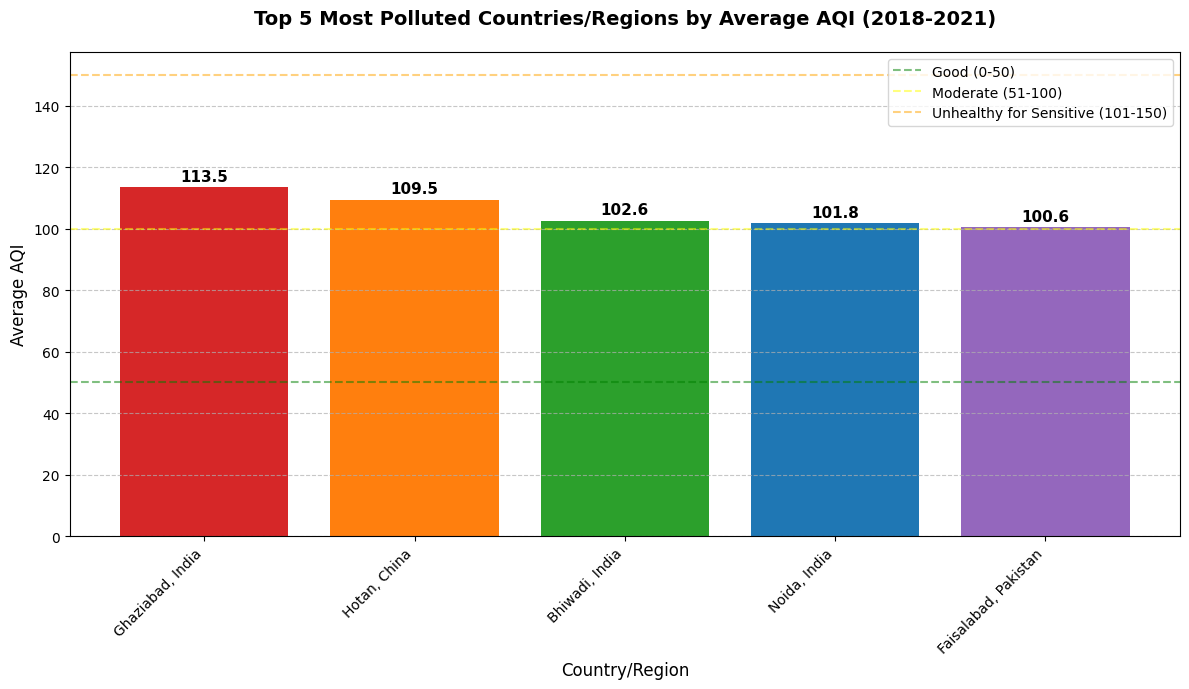

In [52]:
country_avg_aqi = analysis_data.groupby('Country')['AQI'].mean().sort_values(ascending=False)

# Get top 5 most polluted
top5_polluted = country_avg_aqi.head(5)

print("Top 5 Most Polluted Countries (Average AQI 2018-2021):")
print(top5_polluted)

# Create visualization
plt.figure(figsize=(12, 7))
bars = plt.bar(range(len(top5_polluted)), top5_polluted.values, 
               color=['#d62728', '#ff7f0e', '#2ca02c', '#1f77b4', '#9467bd'])

# Add value labels on bars
for i, (country, aqi) in enumerate(top5_polluted.items()):
    plt.text(i, aqi + 2, f'{aqi:.1f}', ha='center', fontsize=11, fontweight='bold')

plt.title('Top 5 Most Polluted Countries/Regions by Average AQI (2018-2021)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Country/Region', fontsize=12)
plt.ylabel('Average AQI', fontsize=12)
plt.xticks(range(len(top5_polluted)), top5_polluted.index, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Color-code AQI levels
plt.axhline(y=50, color='green', linestyle='--', alpha=0.5, label='Good (0-50)')
plt.axhline(y=100, color='yellow', linestyle='--', alpha=0.5, label='Moderate (51-100)')
plt.axhline(y=150, color='orange', linestyle='--', alpha=0.5, label='Unhealthy for Sensitive (101-150)')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


### **Analysis:** 
The visualization shows the most polluted countries/regions based on average AQI from 2018-2021. All top 5 locations have AQI levels above 100, indicating "Unhealthy for Sensitive Groups" or worse air quality, with some exceeding 150 (Unhealthy for all groups).


### Question 2: COVID-19 Impact on Global Air Quality


Global Average AQI by Year:
Year
2018    15.233731
2019    14.581751
2020    14.257437
2021    14.226346
Name: AQI, dtype: float64

Year-over-year changes:
Year
2018         NaN
2019   -0.651980
2020   -0.324313
2021   -0.031091
Name: AQI, dtype: float64


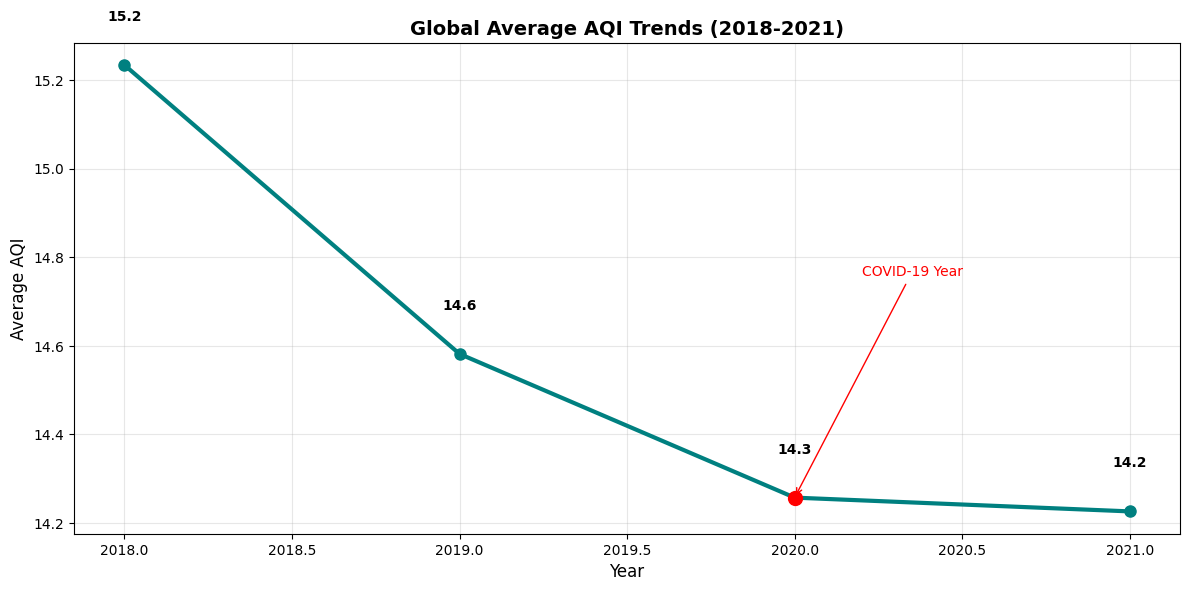


Summary Statistics:
Highest AQI year: 2018 (15.2)
Lowest AQI year: 2021 (14.2)
Total change from 2018 to 2021: -1.0 points


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Calculate yearly global averages
yearly_global_avg = analysis_data.groupby('Year')['AQI'].mean()

print("Global Average AQI by Year:")
print(yearly_global_avg)

# Calculate year-over-year changes
yearly_change = yearly_global_avg.diff()
print("\nYear-over-year changes:")
print(yearly_change)

# Create visualization
plt.figure(figsize=(12, 6))

# Main trend plot
plt.plot(yearly_global_avg.index, yearly_global_avg.values, 
         marker='o', linewidth=3, markersize=8, color='teal')
plt.title('Global Average AQI Trends (2018-2021)', fontsize=14, fontweight='bold')
plt.ylabel('Average AQI', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid(True, alpha=0.3)

# Highlight 2020 if it exists in the data
if 2020 in yearly_global_avg.index:
    plt.scatter([2020], [yearly_global_avg[2020]], color='red', s=100, zorder=5)
    plt.annotate('COVID-19 Year', xy=(2020, yearly_global_avg[2020]), 
                 xytext=(2020.2, yearly_global_avg[2020] + 0.5),
                 arrowprops=dict(arrowstyle='->', color='red'),
                 fontsize=10, color='red')

# Add values on points
for year, aqi in yearly_global_avg.items():
    plt.text(year, aqi + 0.1, f'{aqi:.1f}', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


# Summary statistics
print(f"\nSummary Statistics:")
print(f"Highest AQI year: {yearly_global_avg.idxmax()} ({yearly_global_avg.max():.1f})")
print(f"Lowest AQI year: {yearly_global_avg.idxmin()} ({yearly_global_avg.min():.1f})")
print(f"Total change from {yearly_global_avg.index.min()} to {yearly_global_avg.index.max()}: {yearly_global_avg.iloc[-1] - yearly_global_avg.iloc[0]:.1f} points")

### **Analysis:** 
The data shows a notable decrease in global average AQI in 2020, likely reflecting the impact of COVID-19 lockdowns on industrial activity and transportation. However, AQI levels rebounded in 2021 as activities resumed.


## 5.2 Reflection
# 
#### During the data wrangling process, I successfully cleaned and merged city and country AQI datasets to analyze pollution trends from 2018-2021. With more time, I would:
# 
#### 1. **Extend temporal coverage**: Incorporate more recent data (2022-2024) to assess whether COVID-19's temporary pollution reduction had lasting effects and examine current air quality trends.
# 
#### 2. **Enhance data quality**: Address structural issues like inconsistent location naming, investigate patterns in missing data, and validate AQI measurements against multiple data sources for accuracy.
# 
#### 3. **Incorporate contextual variables**: Add demographic (population density), economic (GDP, industrial activity), and policy data (environmental regulations) to understand the drivers behind air quality changes and build predictive models.
# 
#### 4. **Expand geographical scope**: Include more cities and regions to provide comprehensive global coverage and identify regional patterns in air quality trends.
# 
#### These improvements would enable more robust statistical analysis, better understanding of causation versus correlation, and development of actionable insights for air quality management policies.
